![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




In [361]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

Carguen la base de datos preparada desde la fase 2.

In [362]:
df = pd.read_csv('data_clear.csv')

Separen el dataset en X, y (variable objetivo)

### Eleccion de features

- Quiero seleccionar los k fearures mas significativos utilizando como funcion de score f_classif y el modelo que selecciona SelectKBest

In [363]:
df.columns.shape

(27,)

In [364]:
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import SelectKBest


X_inicial = df.drop(['Hospitalizacion','Dias_Hospitalizacion_MQ','Dias_Hospitalizacion_UPC'],axis = 1)
y = df['Hospitalizacion']

test = f_classif

k = 10

selector = SelectKBest(score_func=test, k = k)

X_new = selector.fit_transform(X_inicial , y)

scores = selector.scores_ ## Puntuacion de cada variable
 
selected_feature_names = list(X_inicial.columns[selector.get_support()])

print(f'Las {k} features mas significativas son {selected_feature_names}')

Las 10 features mas significativas son ['Dias_Post_Biopsia_Complicacion', 'Fiebre', 'ITU', 'Tipo_Cultivo', 'Agente_Aislado', 'Patron_Resistencia_multiples_sensibilidades', 'Patron_Resistencia_no', 'Patron_Resistencia_resistente_ampi_cipro_genta', 'Patron_Resistencia_resistente_ampi_cipro_genta_sulfa', 'Patron_Resistencia_resistente_multiples_antibioticos']


In [365]:
X_inicial.columns

Index(['Edad', 'Diabetes', 'Hospitalizacion_Ultimo_Mes', 'PSA',
       'Biopsias_Previas', 'Volumen_Prostatico', 'Numero_Muestras_Tomadas',
       'CUP', 'Enf_Cronica_Pulmonar_Obstructiva', 'Biopsia',
       'Dias_Post_Biopsia_Complicacion', 'Fiebre', 'ITU', 'Tipo_Cultivo',
       'Agente_Aislado', 'Antibiotico_Profilaxis_cefalospona_aminoglucocido',
       'Antibiotico_Profilaxis_fluoroquinolona_aminoglicosido',
       'Antibiotico_Profilaxis_oroquinolonas', 'Antibiotico_Profilaxis_otros',
       'Patron_Resistencia_multiples_sensibilidades', 'Patron_Resistencia_no',
       'Patron_Resistencia_resistente_ampi_cipro_genta',
       'Patron_Resistencia_resistente_ampi_cipro_genta_sulfa',
       'Patron_Resistencia_resistente_multiples_antibioticos'],
      dtype='object')

In [366]:
scores

array([  1.401,   2.574,   3.047,   2.273,   0.018,   0.483,   4.121,
         0.18 ,   0.655,   7.035, 346.269, 457.17 , 180.736, 273.112,
       273.112,   0.062,   0.174,   2.399,   1.934,  48.77 , 224.037,
        48.77 ,  23.277,  48.77 ])

In [367]:
X = X_inicial[selected_feature_names]


X = X.drop(['Dias_Post_Biopsia_Complicacion'], axis = 1)

In [368]:
X.columns

Index(['Fiebre', 'ITU', 'Tipo_Cultivo', 'Agente_Aislado',
       'Patron_Resistencia_multiples_sensibilidades', 'Patron_Resistencia_no',
       'Patron_Resistencia_resistente_ampi_cipro_genta',
       'Patron_Resistencia_resistente_ampi_cipro_genta_sulfa',
       'Patron_Resistencia_resistente_multiples_antibioticos'],
      dtype='object')

<AxesSubplot: >

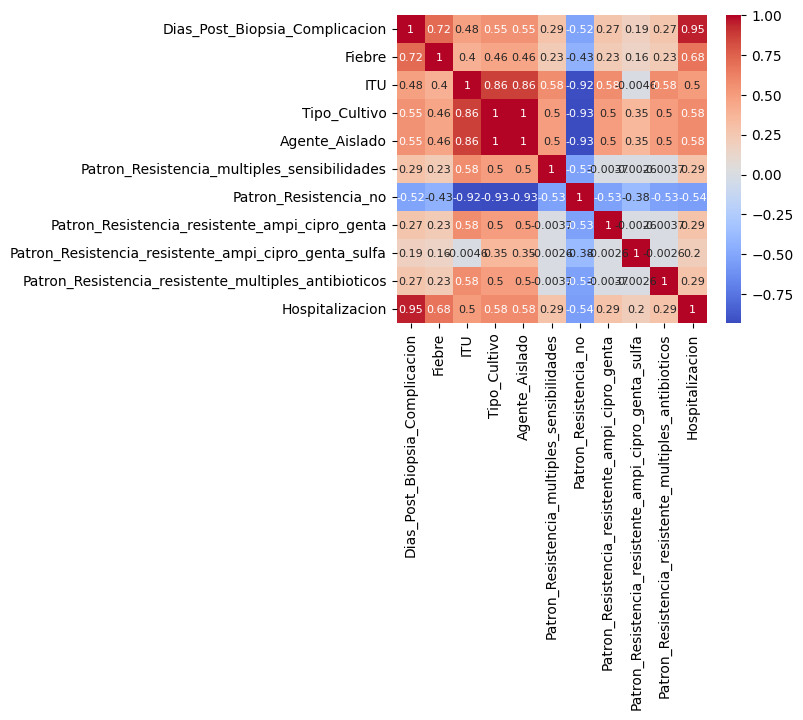

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix_dfC = df[selected_feature_names + ['Hospitalizacion']].corr('spearman')

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix_dfC, cmap='coolwarm', annot=True, annot_kws={'size': 8})

Separen el dataset en X_train, X_test, y_train y y_test

In [369]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 666,stratify=y)
True

True

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [370]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score , precision_score, recall_score

tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

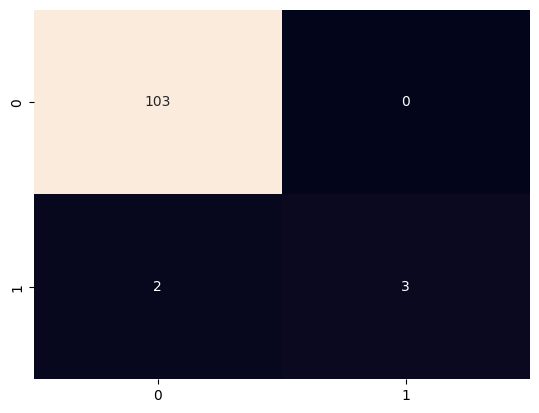

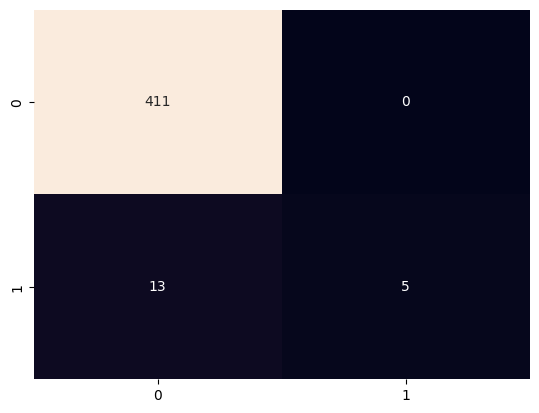

In [377]:
from sklearn.metrics import confusion_matrix, accuracy_score ,f1_score
import seaborn as sns 
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm, annot=True, cbar=False
            ,xticklabels=['0','1'],
            yticklabels=['0','1'],
            fmt='d')
plt.show()

cm = confusion_matrix(y_train,y_train_pred)
sns.heatmap(cm, annot=True, cbar=False
            ,xticklabels=['0','1'],
            yticklabels=['0','1'],
            fmt='d')
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [379]:
print(f'El recall sobre el conjunto de train, {recall_score(y_train, y_train_pred)}')
print(f'El recall sobre el conjunto de test, {recall_score(y_test, y_test_pred)}\n') 

print(f'El accuracy sobre el conjunto de train, {accuracy_score(y_train, y_train_pred)}')
print(f'El accuracy sobre el conjunto de test, {accuracy_score(y_test, y_test_pred)}\n') 

print(f'El precision sobre el conjunto de train, {precision_score(y_train, y_train_pred)}')
print(f'El precision sobre el conjunto de test, {precision_score(y_test, y_test_pred)}\n') 

print(f'El f1 sobre el conjunto de train, {f1_score(y_train, y_train_pred)}')
print(f'El f1 sobre el conjunto de test, {f1_score(y_test, y_test_pred)}') 

El recall sobre el conjunto de train, 0.2777777777777778
El recall sobre el conjunto de test, 0.6

El accuracy sobre el conjunto de train, 0.9696969696969697
El accuracy sobre el conjunto de test, 0.9814814814814815

El precision sobre el conjunto de train, 1.0
El precision sobre el conjunto de test, 1.0

El f1 sobre el conjunto de train, 0.4347826086956522
El f1 sobre el conjunto de test, 0.7499999999999999


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

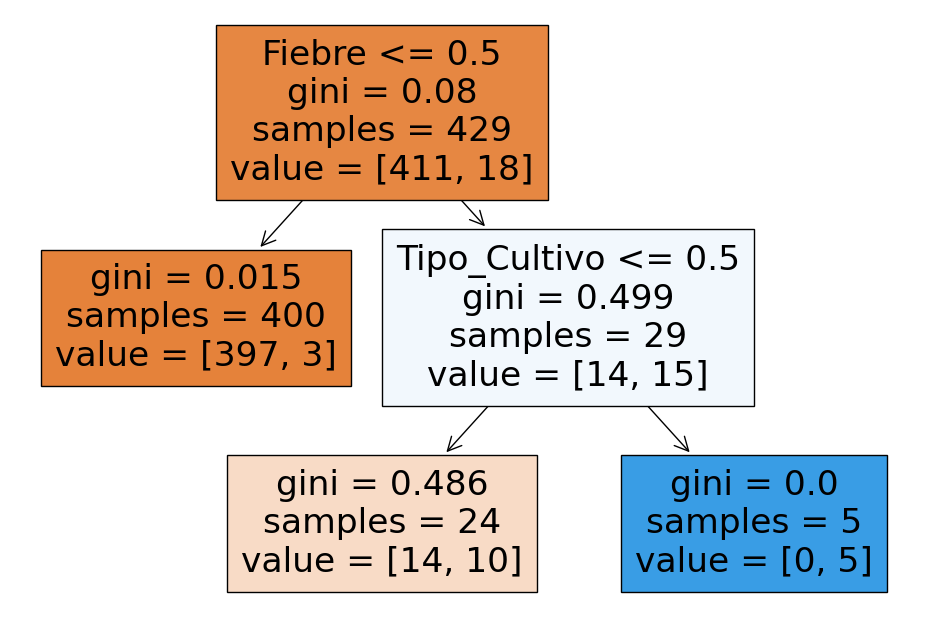

In [373]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

Curva ROC

In [374]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

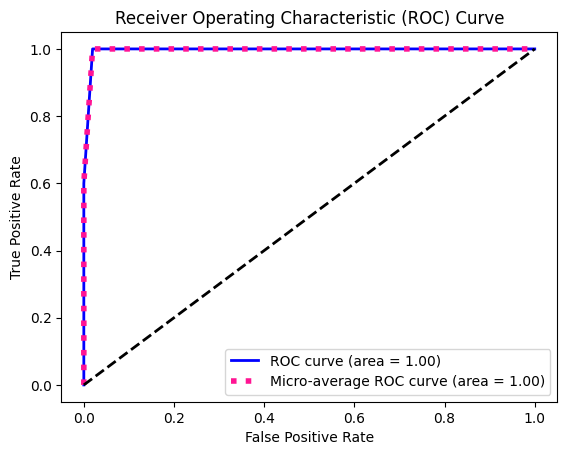

In [375]:
y_test_bin = label_binarize(y_test, classes=[0, 1]) 

# Predict probabilities
y_score = tree.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_test_bin.shape[1]

y_test_bin

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin, y_score[:,1])
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC curve
# plt.figure(figsize=(10, 8))

# Plot each class's ROC curve
colors = cycle(['blue', 'red', 'green'])  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {:.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot the random classifier line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


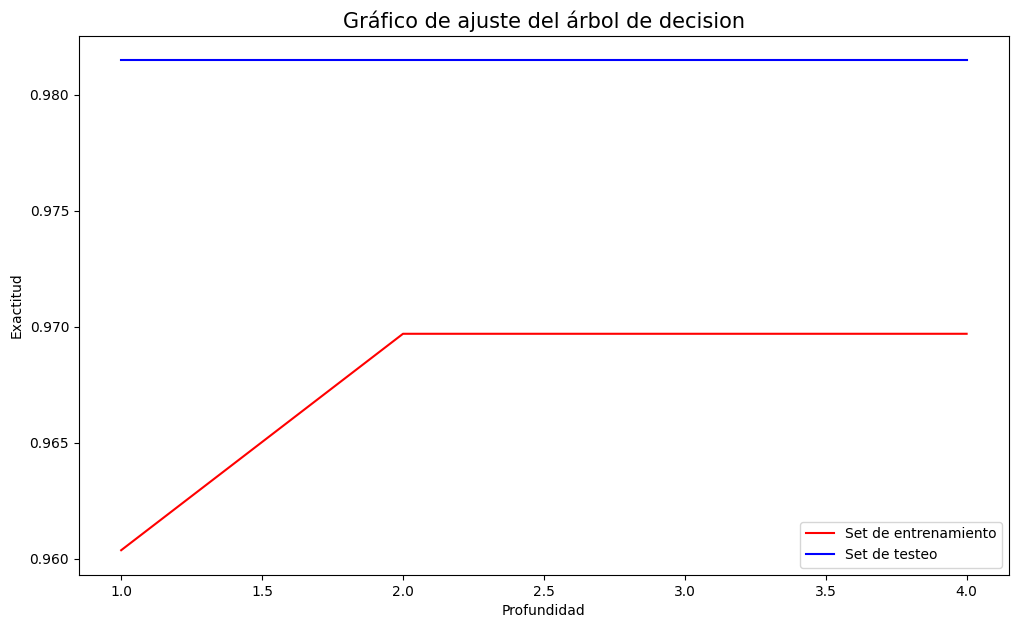

In [376]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 5))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(X_train, y_train)
    train_prec.append(clf_3.score(X_train, y_train))
    eval_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

Encuentre el valor óptimo para k

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/